# Algoritimo de otimização por enxame de particulas




Rafael dos Anjos

Lorran Gabriel

A técnica  de  otimização  por  enxame  de 
partículas  (PSO –  do  inglês Particle  Swarm
Optimization),   foi   criada   por   Kennedy   e 
Eberhart ¹, a partir da análise 
comportamental  dos  pássaros  a  procura  de 
alimento  ou  de  um  local  para  construção  do 
ninho.  Na  procura  pelo  ninho  ou  alimento, 
todo  o  indivíduo  (partícula)  pode  lucrar  com 
as   experiências   dos   membros   do   grupo 
(enxame).   Kennedy  e  Eberhart  propuseram 
um algoritmo de otimização robusto, simples 
e de fácil implementação computacional. 

### Pseudocódigo do PSO
>>>>>>![alt text](https://i.imgur.com/8OWyFzk.png)

>>>>>>Pseudo-Código do PSO ²

### Pseudocódigo para melhor valor

>>>>>>![alt text](https://i.imgur.com/nrJq7L3.jpg)

>>>>>>Pseudocódigo do Algoritmo de Busca Local ³


A teoria do enxame trata do comportamento de seres que vivem em grupo, como abelhas, formigas, passaros e também o homem. Na tecnologia, existem alguns detalhes bastante interessantes que merecem ser abordados quando analisamos o comportamento humano diante de inovações tecnológicas. O algoritmo trata de experiencias e relações naturais, na teoria, o algoritimo segue padrões obtidos diante de analises comportamentais, e transcritos de forma a serem tratados.


Uma teoria sócio-cognitiva muito simples está por trás da PSO. Cada indivíduo de uma população possui sua própria experiência e é capaz de estimar a qualidade dessa experiência. Como os indivíduos são sociais, eles também possuem conhecimentos sobre como seus vizinhos comportam-se. Esses dois tipos de informação correspondem à aprendizagem individual (cognitiva) e à transmissão cultural (social), respectivamente. Portanto, a probabilidade de que um determinado indivíduo tome uma certa decisão será uma função de seu desempenho no passado e do desempenho de alguns de seus vizinhos. ⁴ 

In [0]:

import math
import random
import matplotlib.pyplot as plt


def main(numIte,numparticula,execucao):

    ListaGbest = []
    for l in range(execucao):



        particulas = []
        pbest = []
        gbest = []
        velocidade = []
        bordaInferior = -100
        bordaSuperior = 100
        melhorapt = 0
        fi1 = 0
        fi2 = 0
        wmax = 0.9
        wmin = 0.4
        linha = ""
        vx1 = random.randint(0.15 * bordaInferior, 0.15 * bordaSuperior)
        vx2 = random.randint(0.15 * bordaInferior, 0.15 * bordaSuperior)
        for i in range(numparticula):
            x1 = random.randint(bordaInferior, bordaSuperior)
            x2 = random.randint(bordaInferior, bordaSuperior)
            particulas.append([x1, x2])
            velocidade.append([vx1, vx2])

        ListaGbest.append([])
        for i in range(numIte):

            for j in range(len(particulas)):
                apt = 0.5 + ((math.sin(math.sqrt(particulas[j][0] ** 2 + particulas[j][1] ** 2))) ** 2 - 0.5) / (
                            (1 + 0.001 * (particulas[j][0] ** 2 + particulas[j][1] ** 2)) ** 2)
                if (i == 0):
                    w = 0.9
                    particulas[j].append(apt)
                    pbest.append([particulas[j][0], particulas[j][1]])
                    if i == 0 and j == 0:
                        melhorapt = apt
                        gbest.append(particulas[0][0])
                        gbest.append(particulas[0][1])
                    else:
                        if (particulas[j][2] < melhorapt):
                            melhorapt = particulas[j][2]
                            gbest[0] = particulas[j][0]
                            gbest[1] = particulas[j][1]

                else:
                    if (apt < particulas[j][2]):
                        particulas[j][2] = apt
                        pbest[j][0] = particulas[j][0]
                        pbest[j][1] = particulas[j][1]

                    if (particulas[j][2] < melhorapt):
                        melhorapt = particulas[j][2]
                        gbest[0] = particulas[j][0]
                        gbest[1] = particulas[j][1]

                w = wmax - j * ((wmax - wmin) / len(particulas))

                for k in range(len(velocidade[0])):
                    r1 = random.uniform(0, 1)
                    r2 = random.uniform(0, 1)

                    velocidade[j][k] =  (
                                w * velocidade[j][k] + 2.05 * r1 * (pbest[j][k] - particulas[j][k]) + 2.05 * r2 * (
                                    gbest[k] - particulas[j][k]))

                    if velocidade[j][k] < -15:
                        velocidade[j][k] = -15
                    if velocidade[j][k] > 15:
                        velocidade[j][k] = 15

                    particulas[j][k] = particulas[j][k] + velocidade[j][k]

                if particulas[j][0] > 100:
                    particulas[j][0] = 100
                    velocidade[j][0] = 0

                if particulas[j][0] < -100:
                    particulas[j][0] = 100
                    velocidade[j][0] = 0

                if particulas[j][1] > 100:
                    particulas[j][1] = 100
                    velocidade[j][1] = 0

                if particulas[j][1] < -100:
                    particulas[j][1] = 100
                    velocidade[j][1] = 0
            ListaGbest[l].append(melhorapt)

            nomearq = str(numIte) + "Gbest" + str(l) + ".cvs"
            arq = open(nomearq, "a")
            linha = str(gbest[0]) + "," + str(gbest[1]) + "," + str(melhorapt) + "\n"
            arq.write(linha)

    PlotarmelhorGbest(ListaGbest)
    Plotarmedia(ListaGbest)

    return 0
def PlotarmelhorGbest(ListaGbest):
    menorindice = 0
    menorgbest = ListaGbest[0][len(ListaGbest[0])-1]
    for i in range (len(ListaGbest)):
        if menorgbest > ListaGbest[i][len(ListaGbest[0])-1]:
            menorgbest = ListaGbest[i][len(ListaGbest[0])-1]
            menorindice = i
    print("Melhor Gbest de todos: ",menorgbest)
    plt.plot(ListaGbest[menorindice])
    plt.show()
def Plotarmedia(ListaGbest):
    listamedia = []
    somacol = 0
    for i in range(len(ListaGbest[0])):
        somacol = 0
        for j in range(len(ListaGbest)):
            somacol = somacol+ListaGbest[j][i]
        somacol = somacol/10
        listamedia.append(somacol)
    print("Melhor media:  ",listamedia[len(listamedia)-1])
    plt.plot(listamedia)
    plt.show()
    

### Grafico com 20 iterações


Melhor Gbest de todos:  0.005561260298166892


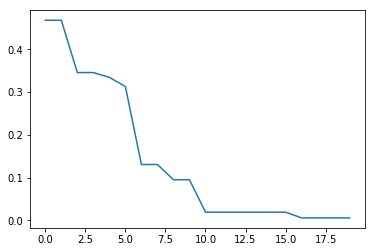

Melhor media:   0.01389188020562947


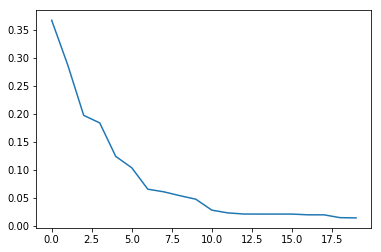

0

In [16]:
main(20,20,10)

###Grafico com 50 Interações


Melhor Gbest de todos:  0.00016391238901247718


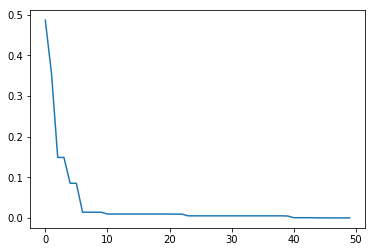

Melhor media:   0.008554878091095319


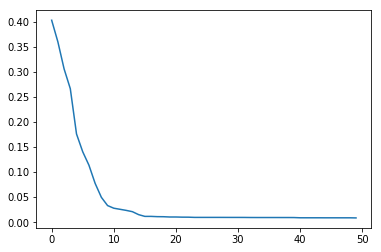

0

In [15]:
main(50,20,10)

###Grafico com 100 Interações


Melhor Gbest de todos:  1.3572482710499933e-05


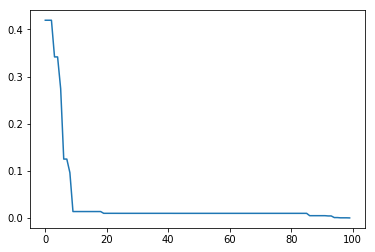

Melhor media:   0.006302497299414733


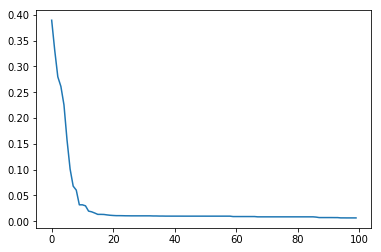

0

In [14]:
main(100,20,10)

## Referencias

¹ Kennedy,  J.;  Eberhart,  R.  C. The  1995  IEEE International Conference on Neural Networks, 1995, .1942-1948. 


² Monteiro, Caio & Bastos-Filho, Carmelo. (2016). Alocação de Comprimentos de Ondas em Redes Ópticas usando Otimização por Enxame de Partículas. Revista de Engenharia e Pesquisa Aplicada. 2. 10.25286/repa.v2i1.394. 


³ BONOTTO, Edison. (2014). ALGORITMO DE OTIMIZAÇÃO POR NUVEM DE PARTÍCULAS APLICADO AO PROBLEMA DA DIVERSIDADE MÁXIMA. 


⁴ SERAPIAO, Adriane Beatriz de Souza. Fundamentos de otimização por inteligência de enxames: uma visão geral. Sba Controle & Automação,  Natal ,  v. 20, n. 3, p. 271-304,  Sept.  2009 .   Available from <http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-17592009000300002&lng=en&nrm=iso>. access on  25  Apr.  2019.  http://dx.doi.org/10.1590/S0103-17592009000300002.


